# Apex Quant - Quant Research/Trading Assessment

Congratulations on advancing to the second round of the Apex Quant Jr Analyst position. This is the second round assessment for the Quant Research and Quant Trading team.

Your assessment will be gauging how you conduct research, derive insights, and how well you can explain your findings.

You have been given some starter code, but this is an opportunity to showcase your creativity and your data exploration skills. Good luck!

If you have any questions, feel free to email apexfundquant@gmail.com.

**This assignment will be due: Saturday, September 16th, at 11:55pm.**

## Prompt

Apex Quant is interested in potentially opening a position on NVDA. You have been tasked with looking into the stock, and we are asking that you back up your thesis with research/stats.

Create data visualizations, and use math/stats to back up whatever your ideas are to the best of your abilities. You are free to use any libraries you want.

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import time
import requests
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime, timedelta, date
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [ ]:
# External libraries outside of colab
!pip install ZigZag
from zigzag import *

## Exploratory Data Analysis

* Derive insights about NVDA's stock.
* Find relationships between NVDA and microeconomic/macroeconomic factors.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


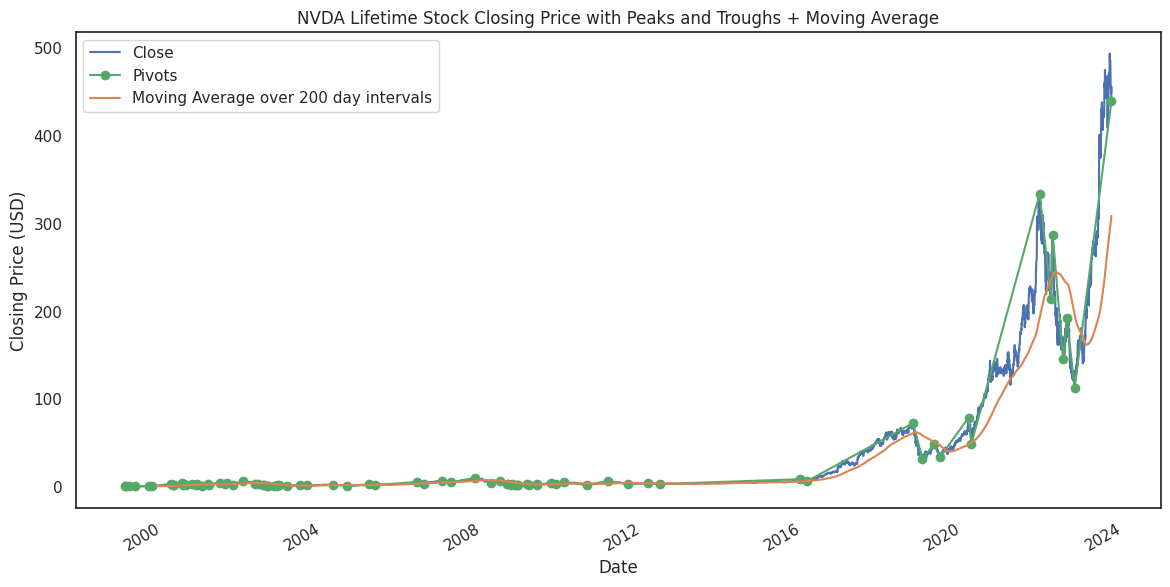

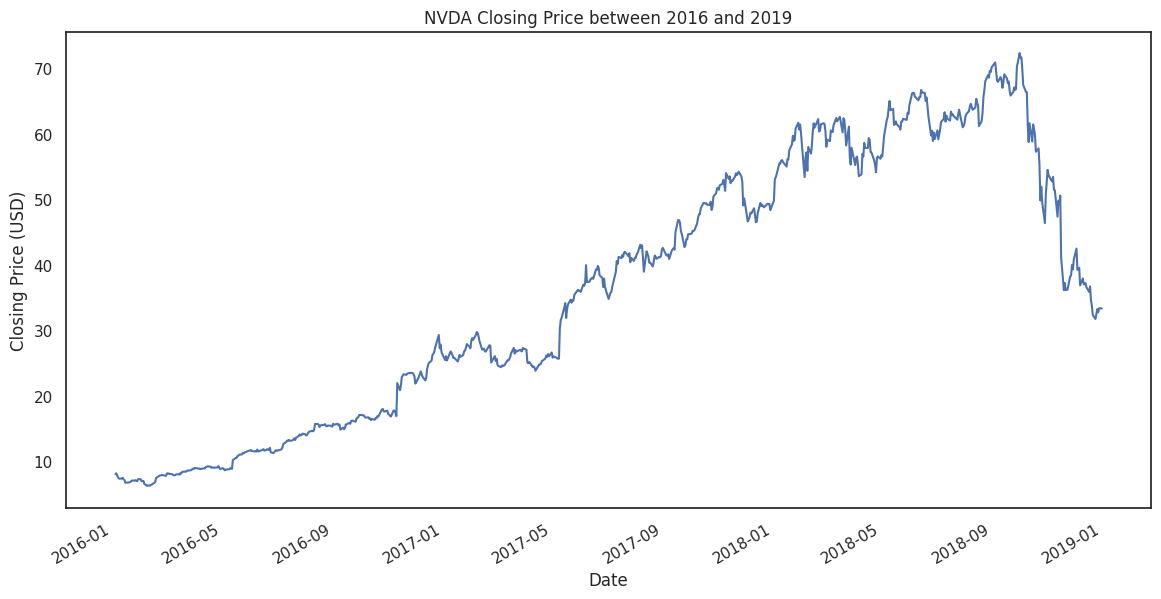

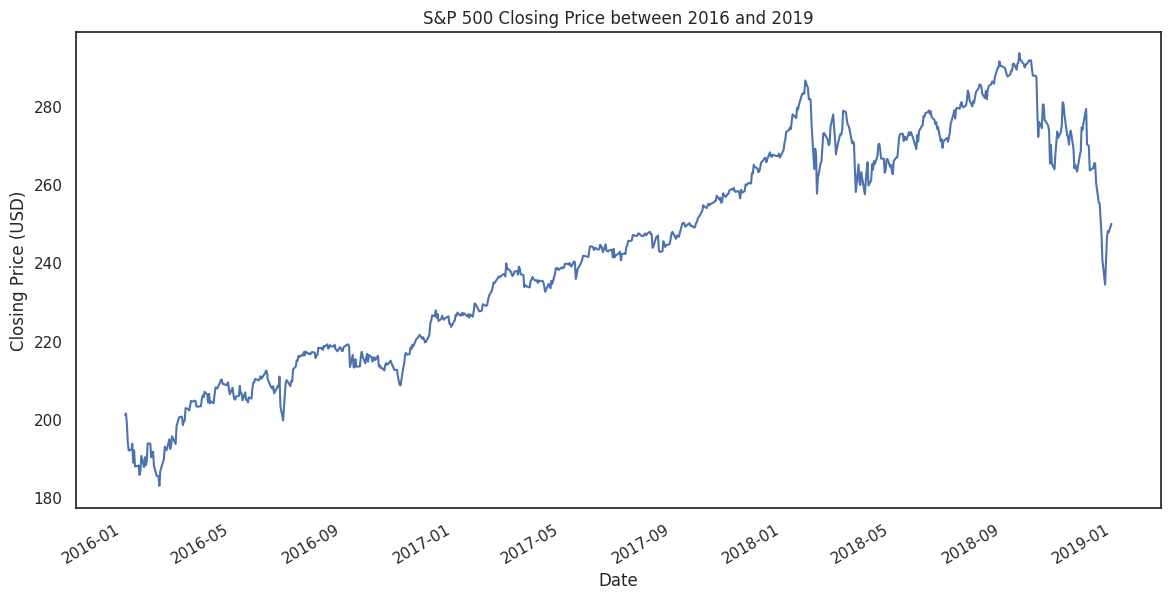

NVDA minimum closing price during 2016 and 2019: 6.304999828338623$
NVDA maximum closing price during 2016 and 2019: 72.33999633789062$


In [ ]:
nvda_prices = yf.download('NVDA', period='max') # Fetches the historical data of Nvidia stock
nvda_prices_2016_2019 = yf.download('NVDA', start='2016-01-01', end='2019-01-01') # Fetches the historical data of Nvidia stock between 2016 and the start of 2019
spy_prices_2016_2019 = yf.download('SPY', start='2016-01-01', end='2019-01-01') # Fetches the historical data of the S&P 500 index fund between 2016 and the start of 2019

# Display of growth peaks and troughs (ADJ close can be used later for analysis of similar stocks + OHLC for most recent + cashflow bar)
nvda_prices.index = pd.to_datetime(nvda_prices.index)

# Creates a overall line plot of NVDA with additional indicators for peaks and troughs, along with moving average
fig1, ax1 = plt.subplots(figsize=(14, 7))

pivots = peak_valley_pivots(nvda_prices['Close'].values, 0.25, -0.25)  # Peaks are >= 125% of the previous trough, whereas troughs are <= 75% of the previous peak
pt_pivots = pd.Series(nvda_prices['Close'], index=nvda_prices.index) # Plots the stock's closing price
pt_pivots = pt_pivots[pivots != 0] # Removes pivots of value 0

nvda_prices['Close'].plot(ax=ax1)
pt_pivots.plot(ax=ax1, style='g-o', label='Pivots')

moving_average = nvda_prices['Close'].rolling(window=200).mean() # Moving average using 200 day intervals for long-term calculations
moving_average.plot(ax=ax1, label='Moving Average over 200 day intervals')

plt.legend()

# Descriptions and labels
ax1.set_title('NVDA Lifetime Stock Closing Price with Peaks and Troughs + Moving Average')
ax1.set_ylabel('Closing Price (USD)')
ax1.set_xlabel('Date')

plt.show()

# Display of NVDA vs S&P 500 closing price between 2016 and the start of 2019
fig2, ax2 = plt.subplots(figsize=(14, 7))

ax2.set_title('NVDA Closing Price between 2016 and 2019')
ax2.set_ylabel('Closing Price (USD)')
ax2.set_xlabel('Date')

nvda_prices_2016_2019['Close'].plot(ax=ax2)
plt.show()

# Display of S&P 500 closing price between 2016 and the start of 2019
fig3, ax3 = plt.subplots(figsize=(14, 7))

ax3.set_title('S&P 500 Closing Price between 2016 and 2019')
ax3.set_ylabel('Closing Price (USD)')
ax3.set_xlabel('Date')

spy_prices_2016_2019['Close'].plot(ax=ax3)
plt.show()

# Prints NVDA lowest price and highest closing price between 2016 and the start of 2019
max_stock_price = nvda_prices_2016_2019['Close'].max()
min_stock_price = nvda_prices_2016_2019['Close'].min()
print("NVDA minimum closing price during 2016 and 2019: " + str(min_stock_price) + "$")
print("NVDA maximum closing price during 2016 and 2019: " + str(max_stock_price) + "$")

# Analysis of peaks and troughs, as well as micro/macro economic conditions:
#
#   Between the time frame of 2016 and the start of 2019, NVDA experienced its first significant growth with a minimum price of ~6$ to a peak of ~72$.
#   Nvdia's total revenue increase by over 200% from ~5B to ~12B. One of the key reasons for their success was their increased expense in R&D of ~85%.
#   Although increased expenses may lead to lower profit, the main reason was for investing in their GPUs and A.I. Thus, Nvidia was able to make significant
#   technological advancements such as releasing the first RTX graphics card that had ray-tracing and A.I. capabilities. Furthermore, they sold many
#   of their computing products to large tech companies including Google, FaceBook (now Meta), and Amazon. However, despite being far ahead of their rival AMD,
#   Nvidia's increased expenses led them to a short trough afterwards. As we can see, the general US economy, based on the S&P 500 was rapidly improving during
#   the same time period with a similar trend as Nvidia. Generally, when the overall economy improves, individual stocks such as NVDA recieve tailwind because
#   investors often gain confidence. This allows them to recieve more funding and capital to grow the company. In fact, NVDA beat the S&P 500 during this time period.
#   Likewise, both the S&P 500 and Nvidia faced a major drop near the beginning of 2019.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


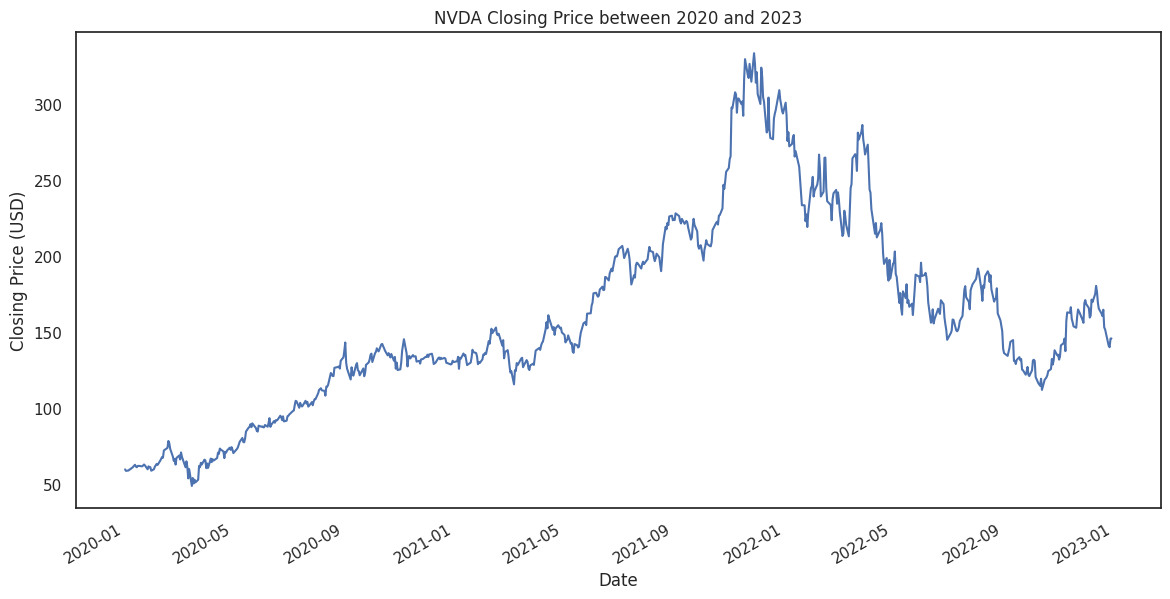

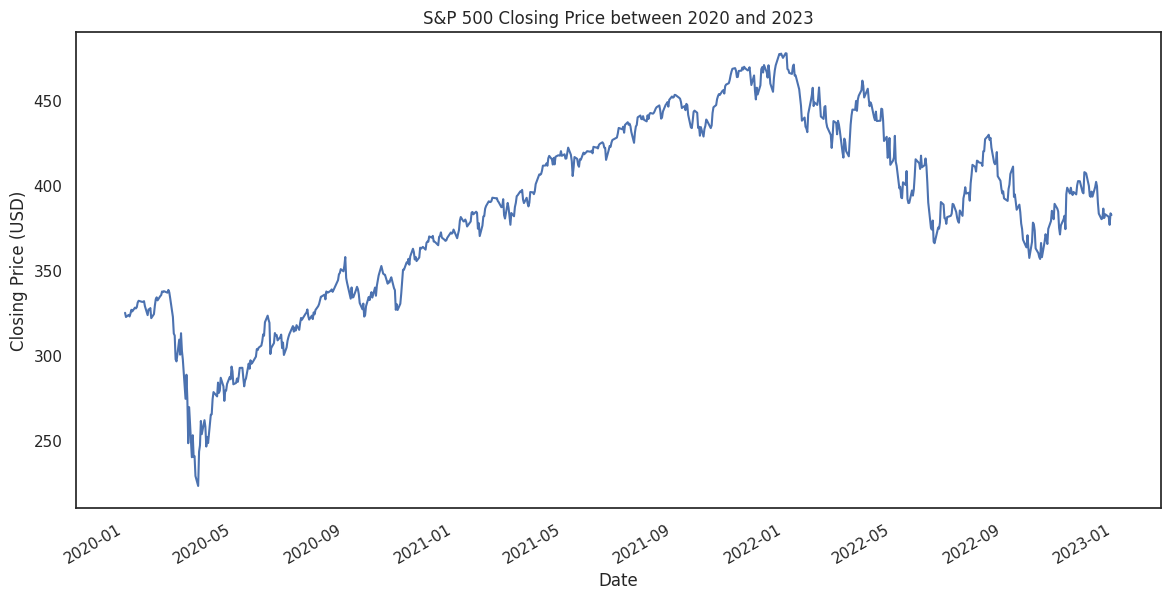

NVDA minimum closing price during 2020 and 2023: 49.099998474121094$
NVDA maximum closing price during 2020 and 2023: 333.760009765625$


In [ ]:
nvda_prices_2020_2023 = yf.download('NVDA', start='2020-01-01', end='2023-01-01') # Fetches the historical data of Nvidia stock between 2020 and the start of 2023
spy_prices_2020_2023 = yf.download('SPY', start='2020-01-01', end='2023-01-01') # Fetches the historical data of the S&P 500 index fund between 2020 and the start of 2023

# Display of NVDA closing price between 2020 and the start of 2023
fig4, ax4 = plt.subplots(figsize=(14, 7))

ax4.set_title('NVDA Closing Price between 2020 and 2023')
ax4.set_ylabel('Closing Price (USD)')
ax4.set_xlabel('Date')

nvda_prices_2020_2023['Close'].plot(ax=ax4)
plt.show()

# Display of S&P 500 closing price between 2020 and the start of 2023
fig5, ax5 = plt.subplots(figsize=(14, 7))

ax5.set_title('S&P 500 Closing Price between 2020 and 2023')
ax5.set_ylabel('Closing Price (USD)')
ax5.set_xlabel('Date')

spy_prices_2020_2023['Close'].plot(ax=ax5)
plt.show()

# Prints NVDA lowest price and highest closing price between 2020 and the start of 2023
max_stock_price = nvda_prices_2020_2023['Close'].max()
min_stock_price = nvda_prices_2020_2023['Close'].min()
print("NVDA minimum closing price during 2020 and 2023: " + str(min_stock_price) + "$")
print("NVDA maximum closing price during 2020 and 2023: " + str(max_stock_price) + "$")

# Analysis of peaks and troughs, as well as micro/macro economic conditions:
#
#   Between the time frame of 2020 and the start of 2023, Nvidia experienced its second significant growth with a minimum price of ~50$ to a peak of ~334$.
#   Nvdia's total revenue increase by ~250% from ~11B to ~27B. One of the main macroecomic factors was the Covid 19 pandemic and rise in video gaming that
#   caused a surge in GPU demand. Furthemore, Nvida's cloud computing services for large companies such as Microsoft, as well as their continued rise in A.I.
#   and autonomy allowed them to hit record sales. Although they appear to follow a similar general trend as the S&P 500, they appear to have greater positive
#   peaks with worse dips. Meanwhile, the S&P 500 stayed more consistent. For instance, at the end of 2022, Nvidia lost 57% in market cap due to A.I.
#   regulations/restrictions, a over-increasing inventory, and semi-conductor supply-chain issues.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


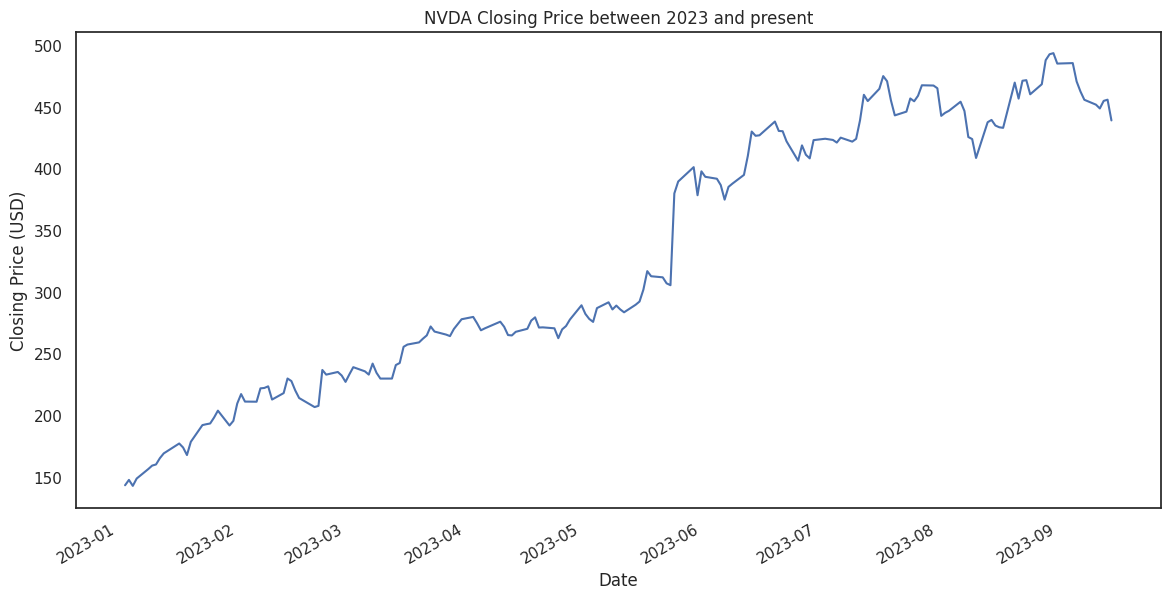

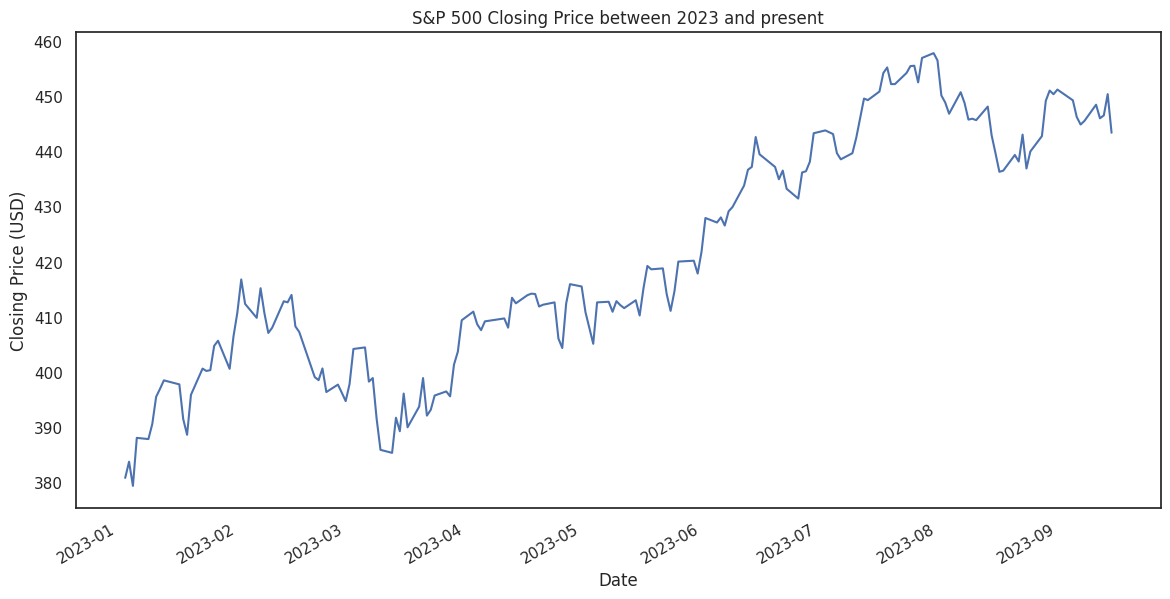

[*********************100%%**********************]  11 of 11 completed


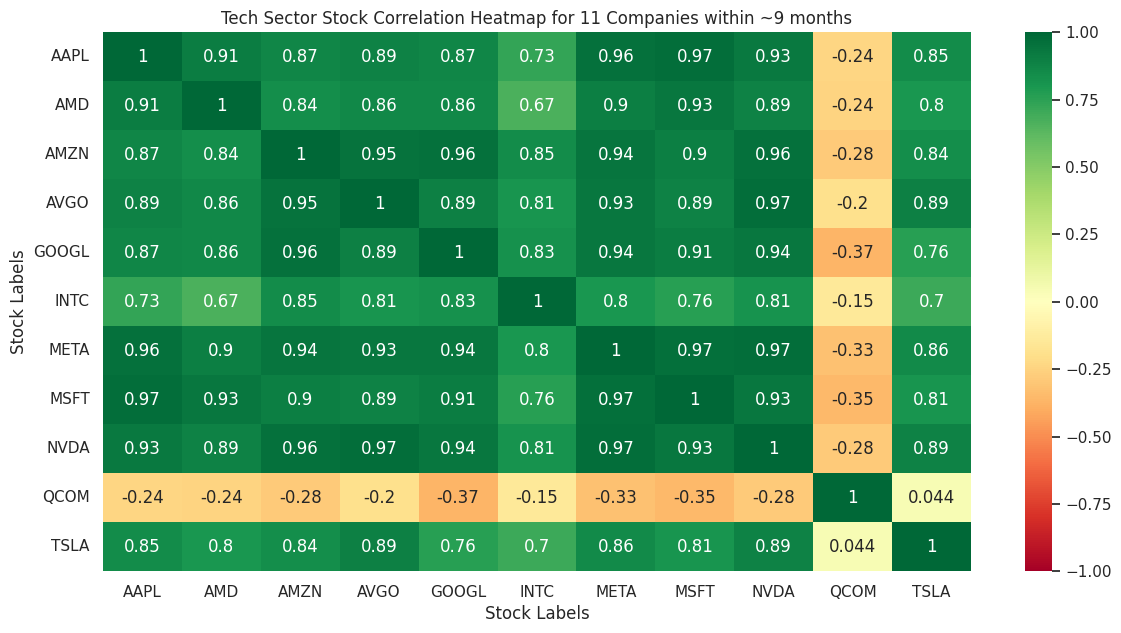

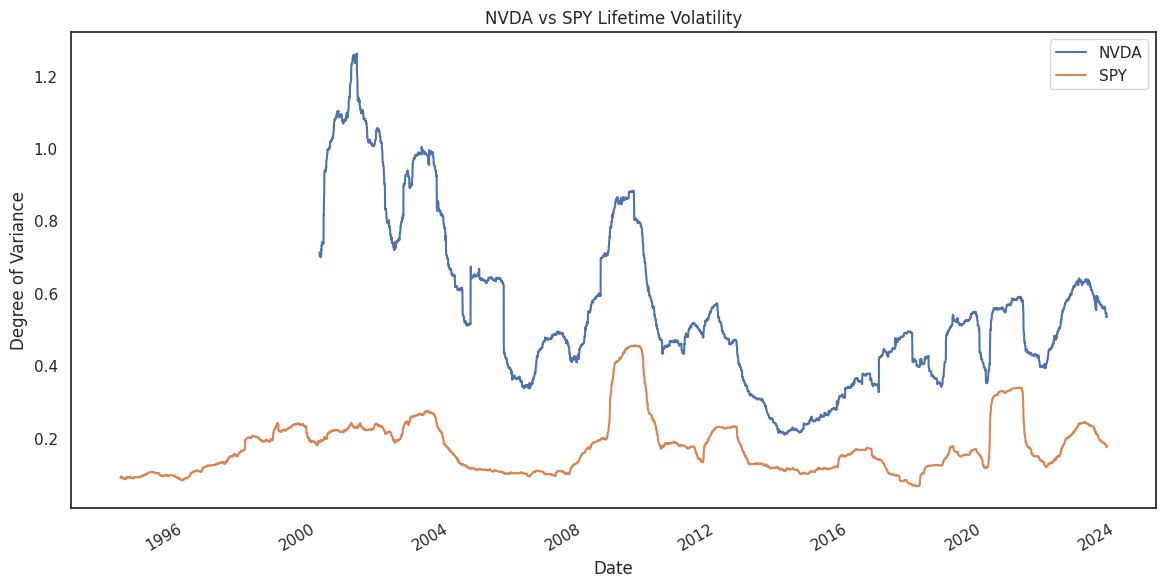

NVDA minimum closing price during 2023 and present: 142.64999389648438$
NVDA maximum closing price during 2023 and present: 493.54998779296875$


In [ ]:
end_date = date.today()
spy_prices = yf.download('SPY', period='max') # Fetches the historical data of SPY stock during entire lifetime
nvda_prices_2023_present = yf.download('NVDA', start='2023-01-01', end=end_date) # Fetches the historical data of Nvidia stock between 2023 and present date
spy_prices_2023_present= yf.download('SPY', start='2023-01-01', end=end_date) # Fetches the historical data of the S&P 500 index fund between 2023 and present date
data = yf.download('NVDA', period='14d', interval='1h')  # Fetches the historical data of Nvidia stock from 2 weeks ago to present date

# Display of NVDA closing price between 2023 and present
fig6, ax6 = plt.subplots(figsize=(14, 7))

ax6.set_title('NVDA Closing Price between 2023 and present')
ax6.set_ylabel('Closing Price (USD)')
ax6.set_xlabel('Date')

nvda_prices_2023_present['Close'].plot(ax=ax6)
plt.show()

# Display of S&P 500 closing price between 2023 and present
fig7, ax7 = plt.subplots(figsize=(14, 7))

ax7.set_title('S&P 500 Closing Price between 2023 and present')
ax7.set_ylabel('Closing Price (USD)')
ax7.set_xlabel('Date')

spy_prices_2023_present['Close'].plot(ax=ax7)
plt.show()

# Heat map display of a stock correlation matrix with Nvidia's top competitors and other big tech companies. Data is based off closing prices.
symbols = ['NVDA', 'AMD',"AVGO", 'QCOM', 'INTC', 'AAPL', 'AMZN', 'GOOGL', 'TSLA', "META", 'MSFT']
recent_prices = yf.download(symbols, start='2023-01-01', end=end_date)

corr_matrix = recent_prices['Close'].corr() # Produces data for the correlation matrix

sns.set(style='white')
fig8, ax8 = plt.subplots(figsize=(14, 7))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax='1', ax=ax8)

ax8.set_title('Tech Sector Stock Correlation Heatmap for 11 Companies within ~9 months')
ax8.set_xlabel('Stock Labels')
ax8.set_ylabel('Stock Labels')

plt.show()

# Displays OHLC candle stick chart of Nvidia within the last 2 weeks
fig9 = go.Figure(data=[go.Candlestick(x=data.index,
                                     open=data['Open'],
                                     high=data['High'],
                                     low=data['Low'],
                                     close=data['Close'])])

fig9.update_layout(title="NVDA OHLC within the last 2 weeks")
fig9.update_xaxes(title_text="Date")
fig9.update_yaxes(title_text="Closing Price (USD)")

fig9.show()

# Displays NVDA vs SPY overall lifetime volatility

# Computes the logarithmic return to quantify percent change based on the ratio of the current day's price and the preceding day's price
nvda_prices['Log_Ret'] = np.log(nvda_prices['Close'] / nvda_prices['Close'].shift(1))
spy_prices['Log_Ret'] = np.log(spy_prices['Close'] / spy_prices['Close'].shift(1))

# Computes volatility (assumes 252 trades annually)
nvda_prices['Volatility'] = nvda_prices['Log_Ret'].rolling(window=252).std() * np.sqrt(252)
spy_prices['Volatility'] = spy_prices['Log_Ret'].rolling(window=252).std() * np.sqrt(252)

fig10, ax10 = plt.subplots(figsize=(14, 7))
ax10.set_title('NVDA vs SPY Lifetime Volatility')
ax10.set_ylabel('Degree of Variance')
ax10.set_xlabel('Date')

nvda_prices['Volatility'].plot(ax=ax10, label="NVDA")
spy_prices['Volatility'].plot(ax=ax10, label="SPY")

plt.legend()
plt.show()

# Prints NVDA lowest price and highest closing price between 2023 and present
max_stock_price = nvda_prices_2023_present['Close'].max()
min_stock_price = nvda_prices_2023_present['Close'].min()
print("NVDA minimum closing price during 2023 and present: " + str(min_stock_price) + "$")
print("NVDA maximum closing price during 2023 and present: " + str(max_stock_price) + "$")

# Analysis of peaks and troughs, as well as micro/macro economic conditions:
#
#   Between the time frame of 2023 and the present, Nvidia experienced its largest growth with a minimum price of ~143$ to a peak of ~494$.
#   Nvdia's total revenue during this time period is currently ~27B, which is the same amount from the end of 2022. The reason for Nvidia's
#   massive growth is almost fully due to the A.I. boom and their impressive chips. Based on the stock correlation matrix/heatmap, we can see that
#   Nvidia's stock moves with a positive correlation, in the same direction as other popular tech stocks. This means that economic factors
#   affecting a company such as Apple or Microsoft will likely also affect Nvidia's performance. Furthermore, if Apex's current portfolio
#   includes the tech stocks displayed in the heatmap, investing in Nvidia will increase the portfolio's overall risk and lower diversification.
#   Furthermore, looking at Nvidia's most recent performance in the last two weeks, it appears that the stock is somewhat unpredictable, causing short
#   term investments to be riskier.
#
#   However, looking at the stock from a long-term perspective, NVDA has consistently grown and made revolutionary leaps in their technological fields.
#   This is demonstrated through the moving average graph, with 200 day intervals, located in the first cell. We can notice that the moving average
#   follows a very similar trend to Nvidia's actual closing prices, indicating Nvidia's stable growth which may likely continue in the future.
#
#   Still, despite NVDA having greatly reduced volatility since its IPO, it is apparent that it's volatility is almost triple that of SPY.
#   Thus, a long-term investment still has some amount of risk to it. On the other hand, Nvidia's volatility opens up the door way for
#   quick short term gains if the timeing is correct.

## Feature Engineering

* Create relevant features for your models.
* Justify your choice of why these features are important.

In [ ]:
# Loads NVDA data
nvda_prices = yf.download('NVDA', period='max')

# Data Cleaning

nvda_prices.fillna(nvda_prices.mean(), inplace=True) # Checks for missing values and replaces them with mean column values if necessary
nvda_prices.drop_duplicates(inplace=True) # Checks and removes duplicate rows with identical values
z_scores = np.abs((nvda_prices - nvda_prices.mean()) / nvda_prices.std()) # Calculates how many standard deviations each value is from the mean
nvda_prices = nvda_prices[z_scores < 3].dropna() # Removes rows with z-scores >= 3 to account for outliers

# Features

# Target Variable and Feature Matrix
y = nvda_prices['Close'] # Target variable for prediction
# This is our base matrix of features
X = nvda_prices.drop('Close', axis=1) # Seperates feature matrix from target variable (Contains every feature (Open, High, Adj Close, Low, Volume))

# The test_size of 0.2 allocates 20% of the stock data for testing or 80% for training.
# 42 represents the seed for the random generator for reproducibility (a reference to a hitchhiker...)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Base train/test set

# The moving average is useful for analyzing and quantifying trends due to its noise reduction and is less affected by volatility compared to other features.
X_ma = nvda_prices['Close'].rolling(window=200).mean() # Moving average of close price using 200 day intervals for long-term calculation
X_ma = X_ma[~np.isnan(X_ma)] # Removes NAN values
y_ma = y[199:] # Matches timeline with moving average timeline

X_train_ma, X_test_ma, y_train_ma, y_test_ma = train_test_split(X_ma, y_ma, test_size=0.2, random_state=42) # Moving average train/test set

# Recursive feature elimination (RFE) selects the most relevant features that influence the stock price.
model = RandomForestRegressor() # Machine learning model

hyper_param = {
    'n_estimators': [100, 200, 500], # Range of potential amounts of individual decision tree
    'max_depth': [10, 20, 30, None], # Range of possible tree depths for over/under fitting
    'max_features': ['sqrt', 'log2'] # Helps control the models complexity
}

selector = SelectKBest(score_func=f_regression, k=3) # Feature selection for RFE for top 3 features
X_top_train_features = selector.fit_transform(X_train, y_train) # Selects the most impactful features (Result in order of importance: Adj Close, Low, High)

[*********************100%%**********************]  1 of 1 completed


## Predictive Modeling

* Create a model to forecast prices.
* Evaluate your model performance.
* Discuss pros/cons of the models you used.


Root mean square error:  0.5546340261089174
R-squared score:  0.9998950974176207
Cross-validation score:  [ 0.98802106  0.99969786  0.99979443  0.99553697  0.99962813  0.99796843
  0.98533559  0.95215298  0.90509311 -1.56553474]


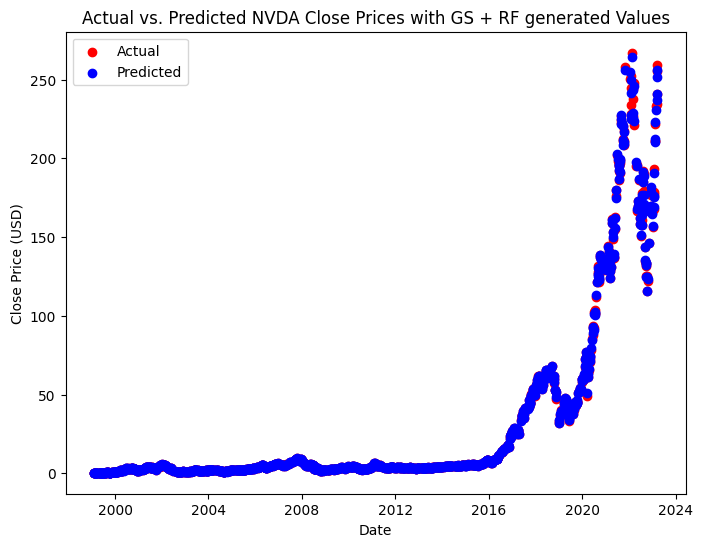

Base Root mean square error:  0.13810873910675833
Base R-squared score:  0.9999934954765918
Base Cross-validation score:  [0.978778   0.98594825 0.98792308 0.9780281  0.9936549  0.98981142
 0.99648556 0.99990546 0.99993346 0.99975912]
MA Root mean square error:  15.310163976311056
MA R-squared score:  0.920900427869252
MA Cross-validation score:  [ -0.088771   -18.66075833  -0.07712313  -0.95245331  -3.08556963
 -53.66279702  -0.95878761   0.82368494   0.42123319  -0.40309301]


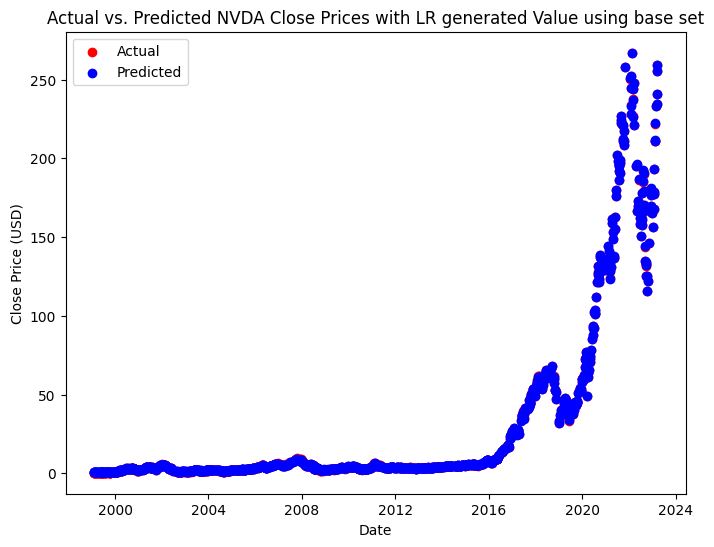

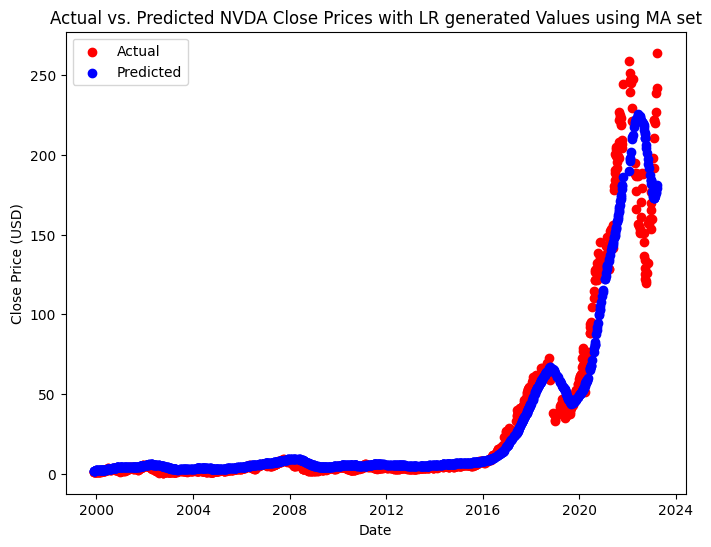

Epoch 1/100
148/148 [==============================] - 1s 4ms/step - loss: 213580759040.0000 - val_loss: 1392311.8750
Epoch 2/100
148/148 [==============================] - 1s 4ms/step - loss: 46903.4180 - val_loss: 180.7587
Epoch 3/100
148/148 [==============================] - 0s 3ms/step - loss: 173.7093 - val_loss: 184.2282
Epoch 4/100
148/148 [==============================] - 1s 4ms/step - loss: 171.6388 - val_loss: 180.8706
Epoch 5/100
148/148 [==============================] - 1s 4ms/step - loss: 172.1620 - val_loss: 177.5266
Epoch 6/100
148/148 [==============================] - 0s 3ms/step - loss: 168.8828 - val_loss: 173.8349
Epoch 7/100
148/148 [==============================] - 0s 3ms/step - loss: 175.2980 - val_loss: 177.7155
Epoch 8/100
148/148 [==============================] - 0s 3ms/step - loss: 182.9742 - val_loss: 170.6330
Epoch 9/100
148/148 [==============================] - 0s 3ms/step - loss: 167.5967 - val_loss: 179.8462
Epoch 10/100
148/148 [==================

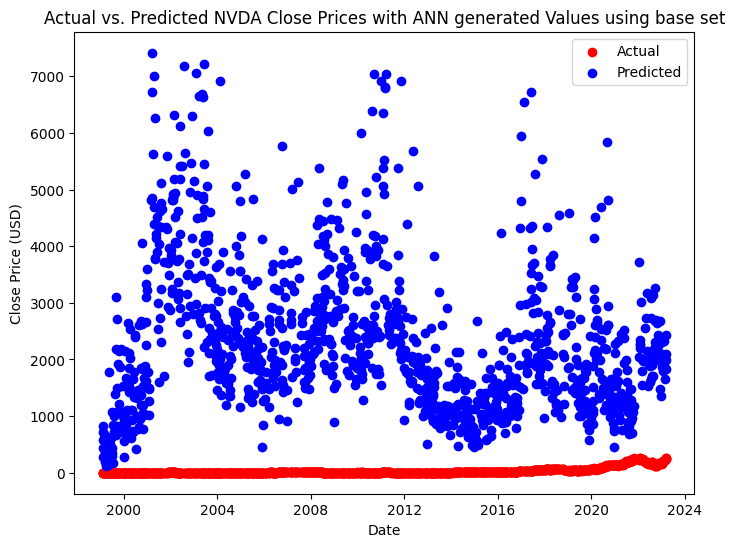

Epoch 1/100
143/143 [==============================] - 1s 3ms/step - loss: 2267.3457 - val_loss: 543.5018
Epoch 2/100
143/143 [==============================] - 0s 2ms/step - loss: 280.2691 - val_loss: 236.7165
Epoch 3/100
143/143 [==============================] - 0s 2ms/step - loss: 223.1398 - val_loss: 234.7614
Epoch 4/100
143/143 [==============================] - 0s 2ms/step - loss: 221.8851 - val_loss: 235.0187
Epoch 5/100
143/143 [==============================] - 0s 2ms/step - loss: 221.0466 - val_loss: 237.8058
Epoch 6/100
143/143 [==============================] - 0s 2ms/step - loss: 222.8874 - val_loss: 234.6860
Epoch 7/100
143/143 [==============================] - 0s 2ms/step - loss: 222.0354 - val_loss: 234.8162
Epoch 8/100
143/143 [==============================] - 0s 2ms/step - loss: 221.7126 - val_loss: 237.3810
Epoch 9/100
143/143 [==============================] - 0s 2ms/step - loss: 222.9340 - val_loss: 234.3896
Epoch 10/100
143/143 [==============================] 

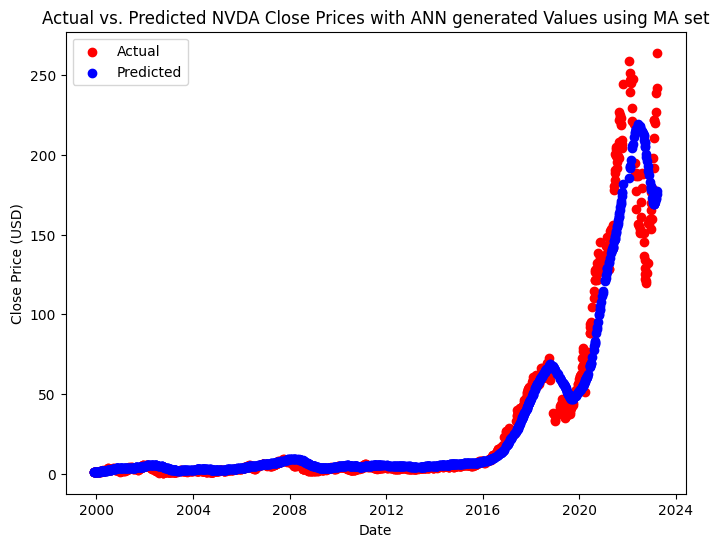

In [ ]:
# Predicts with grid search hyper parameters with RFE features

# Hyperparameter tuning
grid = GridSearchCV(estimator=model, param_grid=hyper_param, scoring='neg_mean_squared_error', cv=5, n_jobs=-1) # Searches for best hyperparameter combination with 5-fold cross-validation
# Applies grid search to the specific data and trains a machine learning model (Takes ~3 mins)
grid_model = grid.fit(X_top_train_features, y_train).best_estimator_ # best estimator chooses the top-performing ML model found with grid search
# Result:  Score: -0.260954 using max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 200

X_top_test_features = selector.transform(X_test)
X_top_features = selector.transform(X)
ypred1 = grid_model.predict(X_top_test_features)

# Performance Evaluation
mse = mean_squared_error(y_test, ypred1)
rmse = np.sqrt(mse) # Root mean square error (Average distance of predicted values vs real values)
r2 = r2_score(y_test, ypred1) # R^2, percent of variance explained and level of data fitness
cross_val = cross_val_score(grid_model, X_top_features, y, cv=10) # K-fold cross validation that tests 10 groups of split data for overfitting

print('Root mean square error: ', rmse)
print('R-squared score: ', r2)
print('Cross-validation score: ', cross_val)

# Compares the Actual vs Predicted NVDA Close Prices Graphically for Grid Search + Random Forest model
plt.figure(figsize=(8, 6))
plt.scatter(X_test.index, y_test, label='Actual', color='red') # X_test.index is used because X_top_test_features lacks an index
plt.scatter(X_test.index, ypred1, label='Predicted', color='blue')

plt.title('Actual vs. Predicted NVDA Close Prices with GS + RF generated Values')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

# Linear Regression Model
lr_model_base = LinearRegression() # Using base set of every feature except price
lr_model_base.fit(X_train, y_train)
ypred2 = lr_model_base.predict(X_test)

lr_model_ma = LinearRegression() # Using moving average feature set
lr_model_ma.fit(X_train_ma.values.reshape(-1,1), y_train_ma)
ypred2_ma = lr_model_ma.predict(X_test_ma.values.reshape(-1,1))

# Performance Evaluation

# Base set
mse = mean_squared_error(y_test, ypred2)
rmse = np.sqrt(mse) # Root mean square error
r2 = r2_score(y_test, ypred2) # R^2
cross_val = cross_val_score(lr_model_base, X, y, cv=10) # K-fold cross

print('Base Root mean square error: ', rmse)
print('Base R-squared score: ', r2)
print('Base Cross-validation score: ', cross_val)

# Moving average set
mse = mean_squared_error(y_test_ma, ypred2_ma)
rmse = np.sqrt(mse) # Root mean square error (Average distance of predicted values vs real values)
r2 = r2_score(y_test_ma, ypred2_ma) # R^2, percent of variance explained and level of data fitness
cross_val = cross_val_score(lr_model_ma, X_ma.values.reshape(-1,1), y_ma, cv=10) # K-fold cross

print('MA Root mean square error: ', rmse)
print('MA R-squared score: ', r2)
print('MA Cross-validation score: ', cross_val)

# Compares the Actual vs Predicted NVDA Close Prices Graphically for Linear Regression Model

# Base set
plt.figure(figsize=(8, 6))
plt.scatter(X_test.index, y_test, label='Actual', color='red')
plt.scatter(X_test.index, ypred2, label='Predicted', color='blue')

plt.title('Actual vs. Predicted NVDA Close Prices with LR generated Value using base set')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

# Moving average set
plt.figure(figsize=(8, 6))
plt.scatter(X_test_ma.index, y_test_ma, label='Actual', color='red')
plt.scatter(X_test_ma.index, ypred2_ma, label='Predicted', color='blue')

plt.title('Actual vs. Predicted NVDA Close Prices with LR generated Values using MA set')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

# Artificial Neural Network (ANN)

# Base Set
ann_model = Sequential() # Linear stack of layers
ann_model.add(Dense(units=64, input_dim=5)) # Dense layer with 64 neurons and 5 input dimensions. Relu activation is used for non-linearity.
ann_model.add(Dense(units=1)) # Output layer with single neuron for single output
ann_model.compile(loss='mean_squared_error', optimizer='adam') # MSE for loss, Adaptive Moment Estimation for adjusting learning rate

ann_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test)) # Training
ypred3 = ann_model.predict(X_test)

# Performance Evaluation
mse = mean_squared_error(y_test, ypred3)
rmse = np.sqrt(mse) # Root mean square error
r2 = r2_score(y_test, ypred3) # R^2
#cross_val N/A

print('Base Root mean square error: ', rmse)
print('Base R-squared score: ', r2)

# Compares the Actual vs Predicted NVDA Close Prices Graphically for ANN Model with base set
plt.figure(figsize=(8, 6))
plt.scatter(X_test.index, y_test, label='Actual', color='red')
plt.scatter(X_test.index, ypred3, label='Predicted', color='blue')

plt.title('Actual vs. Predicted NVDA Close Prices with ANN generated Values using base set')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

# Moving average set
ann_model_ma = Sequential() # Linear stack of layers
ann_model_ma.add(Dense(units=64, activation='relu', input_dim=1)) # Dense layer with 64 neurons and 1 input dimensions. Relu activation is used for non-linearity.
ann_model_ma.add(Dense(units=1)) # Output layer with single neuron for single output
ann_model_ma.compile(loss='mean_squared_error', optimizer='adam') # MSE for loss, Adaptive Moment Estimation for adjusting learning rate

ann_model_ma.fit(X_train_ma, y_train_ma, epochs=100, batch_size=32, validation_data=(X_test_ma, y_test_ma)) # Training
ypred3_ma = ann_model_ma.predict(X_test_ma)

# Performance Evaluation
mse = mean_squared_error(y_test_ma, ypred3_ma)
rmse = np.sqrt(mse) # Root mean square error
r2 = r2_score(y_test_ma, ypred3_ma) # R^2
#cross_val N/A

print('MA Root mean square error: ', rmse)
print('MA R-squared score: ', r2)

# Compares the Actual vs Predicted NVDA Close Prices Graphically for ANN Model with moving average set
plt.figure(figsize=(8, 6))
plt.scatter(X_test_ma.index, y_test_ma, label='Actual', color='red')
plt.scatter(X_test_ma.index, ypred3_ma, label='Predicted', color='blue')

plt.title('Actual vs. Predicted NVDA Close Prices with ANN generated Values using MA set')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

# Analysis of each model
#
#   It appears that our linear regression (LR) model using the base set (Open, Close, High, Low, Adjusted Close) has the best results with RMSE = ~0.135, R2 = ~0.99999,
#   and the cross-val scores are all around ~0.98. The LR model also runs very quickly. However, its performance significantly becomes worse when using the moving average
#   as the only feature. Our second best model only uses the top 3 features (Adjusted Close, Low, High) with grid search. Although it's performance metrics are close to LR
#   with RMSE = ~0.529, R2 = ~0.99991, and similar cross-val scores, it suffers from a long training time of ~3 minutes. Our final model that uses an artificial neural network
#   had the overall worse performance when using the base set. It's overall performance metric was very subpar and inconsistent (decent results were sometimes generated).
#   Furthermore, the model also has a sizeable training time of ~2 minutes. Meanwhile, when using the moving average as it's singular feature, modest results of RMSE = ~15.206 and
#   R2 = ~0.919, though these performance results still fall behind the previous two models.

## Recommendation

* Justify your research.
* Insights on potential risks/uncertainties. Do you foresee any macroeconomic risks (economic turbulence, politics, etc.), or microeconomic risks (competition, bubbles, product demand, etc.)?

I recommend buying NVDA (NVIDIA Corporation) as a long-term investment. However, I suggest not rushing into it at the moment. Notably, NVDA has exhibited a recurring pattern in its historical performance: after periods of significant growth, it tends to experience short-term dips. Additionally, the current Price-to-Earnings (P/E) ratio for NVDA stands at ~105,  making it a significantly high-risk investment in the short term. This elevated P/E ratio is largely attributed to the “hype” surrounding artificial intelligence (AI), a trend that should subside over time. Nonetheless, when the AI bubble pops, there is a strong likelihood that NVDA's stock price will decline due to a reduction in demand for AI products. During this trough, I recommend Apex to open a position on NVDA.

If we examine NVDA's recent performance over a two-week period, it appears to be quite volatile without an obvious pattern, making short term investments to be quite risky. However,  NVDA's long-term performance paints a different picture. Over the past few years, NVDA has demonstrated remarkable strength, outperforming the U.S. stock market in terms of growth while maintaining relatively decent volatility of ~0.6.  This success is due to NVDA's impressive technology portfolio, which includes a dominant presence in the hardware market for graphic cards and computing with unimpressive competitors, as well as being a leading figure in artificial intelligence. Furthermore, NVDA's stable and enduring relationships with major tech companies have consistently resulted in lucrative deals and partnerships that drive innovation. Though, one macroeconomic risk that may slightly affect NVDA is the regulation of AI, which may reduce the demand and value for their AI products, their hardware will remain strong.

Still, it's important to consider that if Apex already has positions in other technology companies, adding NVDA to the portfolio will reduce diversity. This is because NVDA's stock price is closely correlated with the performance of other tech giants. In summary, while NVDA carries short-term risks due to its high P/E ratio and short-term market volatility, its impressive technology foundation, successful long-term track record, and strategic industry partnerships make it an appealing option as a long-term investment for Apex.
